In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_excel("desktop/ufc.xlsx")

pd.set_option('display.max_columns', None)  # Show all columns

df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,RESULT,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,Red,SUB,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,Red,U-DEC,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,Red,S-DEC,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.30,0.58,1.6,3.45,0.41,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98,Red,KO/TKO,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,False,Featherweight,MALE,3,0,1,1,4.41,0.53,0.8,0.75,0.37,3,3,15,0,0,0,0,4,0,0,4,Orthodox,177.80,177.80,145,0,1,0,6.25,0.46,1.0,1.00,0.41,3,3,17,0,1,0,1,1,2,0,5,Orthodox,175.26,182.88,145,36,33,0,0,0,-1,0,-2,0,3,-2,2.54,-5.08,-3,-1.84,-0.2,-0.25,neither,KO/TKO,275.0,550.0,500.0,700.0,300.0,250.0


In [2]:
df = df[['WeightClass', 'RESULT']].dropna()
finish_counts=df.groupby(['WeightClass', 'RESULT']).size().unstack().fillna(0)

finish_counts # gives a table: a specific weight class, and the count of RESULTS for each.
# it's pivot-table vibes almost. Given X = WeightClass and Y = Result, show me the elements of X along with their elements in Y.

RESULT,DQ,KO/TKO,M-DEC,Overturned,S-DEC,SUB,U-DEC
WeightClass,,,,,,,
Bantamweight,1.0,183.0,4.0,1.0,76.0,134.0,267.0
Catch Weight,0.0,15.0,0.0,0.0,4.0,14.0,24.0
Featherweight,1.0,209.0,6.0,1.0,74.0,126.0,313.0
Flyweight,1.0,83.0,0.0,0.0,43.0,65.0,140.0
Heavyweight,2.0,249.0,5.0,0.0,22.0,60.0,133.0
Light Heavyweight,0.0,221.0,6.0,0.0,35.0,83.0,142.0
Lightweight,2.0,319.0,9.0,0.0,114.0,217.0,389.0
Middleweight,4.0,287.0,4.0,0.0,72.0,141.0,245.0
Welterweight,5.0,310.0,7.0,0.0,106.0,167.0,383.0


In [3]:
# This next bit lets us normalize horizontally, so that the ROWS sum to 100.
finish_rates = 100*finish_counts.div(finish_counts.sum(axis=1), axis=0)
finish_rates

RESULT,DQ,KO/TKO,M-DEC,Overturned,S-DEC,SUB,U-DEC
WeightClass,,,,,,,
Bantamweight,0.150150,27.477477,0.600601,0.150150,11.411411,20.120120,40.090090
Catch Weight,0.000000,26.315789,0.000000,0.000000,7.017544,24.561404,42.105263
Featherweight,0.136986,28.630137,0.821918,0.136986,10.136986,17.260274,42.876712
Flyweight,0.301205,25.000000,0.000000,0.000000,12.951807,19.578313,42.168675
Heavyweight,0.424628,52.866242,1.061571,0.000000,4.670913,12.738854,28.237792
Light Heavyweight,0.000000,45.379877,1.232033,0.000000,7.186858,17.043121,29.158111
Lightweight,0.190476,30.380952,0.857143,0.000000,10.857143,20.666667,37.047619
Middleweight,0.531208,38.114210,0.531208,0.000000,9.561753,18.725100,32.536521
Welterweight,0.511247,31.697342,0.715746,0.000000,10.838446,17.075665,39.161554


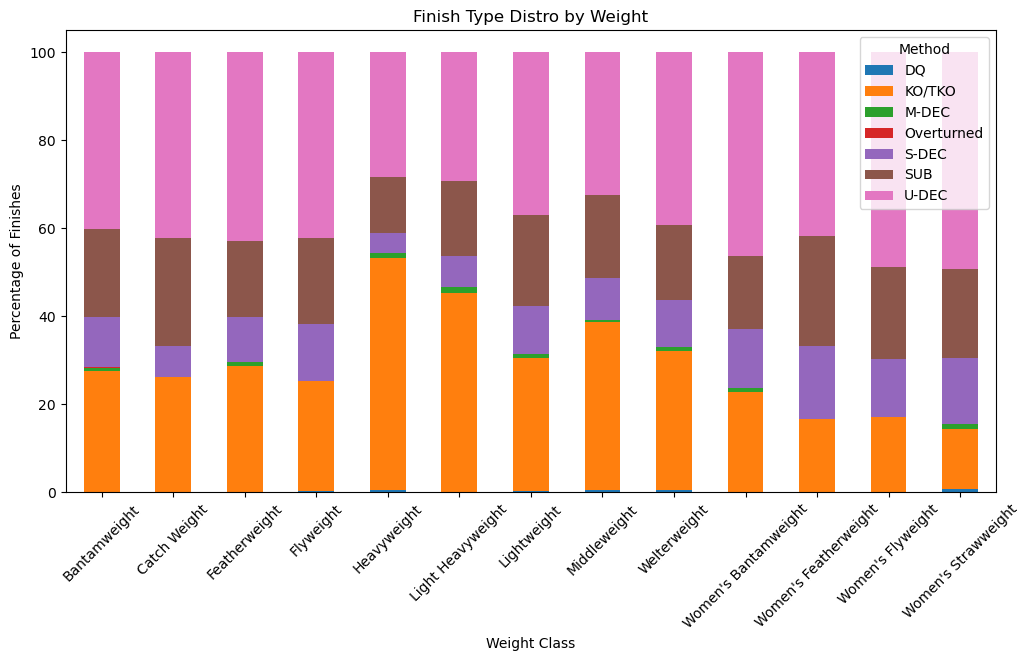

In [10]:
# and finally, we plot.

finish_rates.plot(kind='bar', stacked=True, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", 
                 "#9467bd", "#8c564b", "#e377c2"], figsize=(12,6))

plt.title('Finish Type Distro by Weight')
plt.xlabel('Weight Class')
plt.ylabel('Percentage of Finishes')
plt.legend(title='Method')
plt.xticks(rotation=45)
plt.show()